In [24]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [25]:
# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []
xstep2 = []

#par = np.array([-3.0,-3.0,3.0,1.0])
#par = np.array([0.0,0.0,0.0,1.0])
par = np.array([1.80,-4.05,0.4,1.0])

nroots_expected = 3

In [26]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [27]:
for nsearch in range(1,int(npoints/2)):
    
    start = time.time()

    niter = npoints/nsearch
    ycomp = yval[0]
    xcomp = xval[0]
    nroots_found = 0

    for i in range(1,int(niter)+1):
        y = yval[nsearch*i-1]
        x = xval[nsearch*i-1]
        
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % x)
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xcomp
            xhigh = x
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
            xcomp = x
        else:
            ycomp = y
            xcomp = x

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(niter)
    xstep2.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)
    

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3



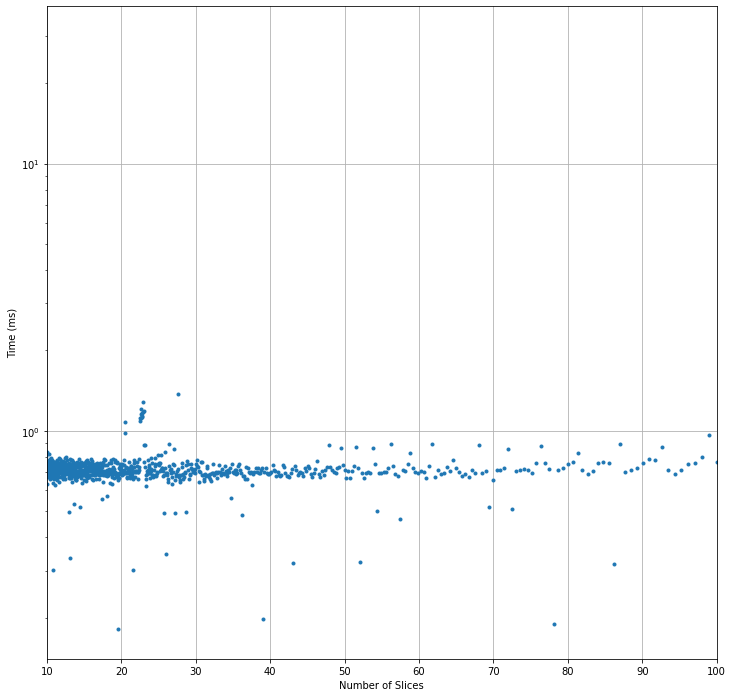

In [28]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
#plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Number of Slices')
axs.axhline()
plt.grid(True)
axs.set_xlim(10,100)
plt.show()

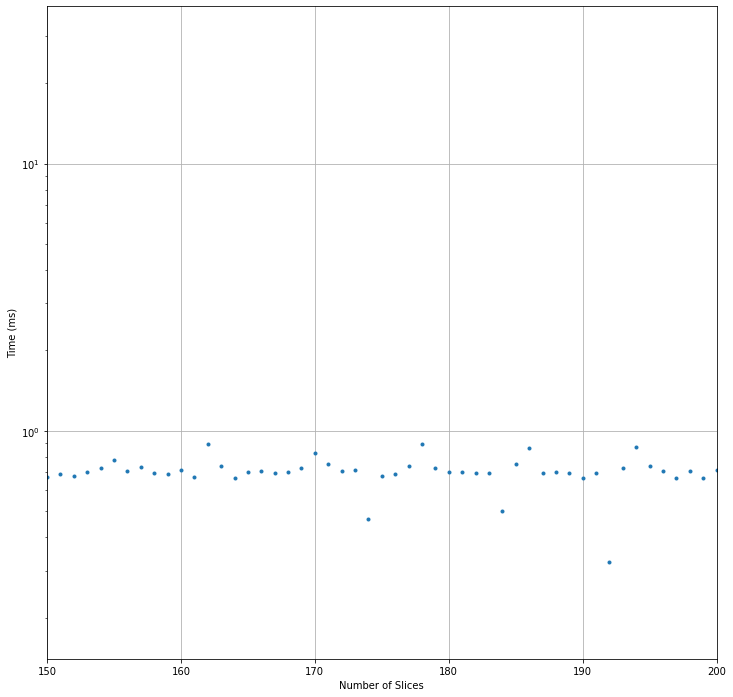

In [31]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
#plt.xscale('log')
axs.plot(xstep2,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Number of Slices')
axs.axhline()
plt.grid(True)
axs.set_xlim(150,200)
plt.show()